**Algoritmos**

## **Programação Dinâmica: Multiplicação em Cadeia de Matrizes**

**Conceito**: A programação dinâmica é um método de desenvolvimento que busca
encontrar a solução de vários subproblemas para, daí então, encontrar a
solução do problema geral.
  * A grande novidade dessa metodologia é que os subresultados são
armazenados em memória pois eles são utilizados em diversos momentos
dentro do cômputo da solução. 

---



**Problema**: Multiplicação de cadeias de matrizes

* A multiplicação de cadeias de matrizes (ou Matrix Chain Ordering Problem, MCOP) é um problema de otimização que busca a maneira mais eficiente de multiplicar uma dada sequência de matrizes. O problema não é realmente realizar as multiplicações, mas apenas decidir a sequência das multiplicações de matrizes envolvidas.
* A multiplicação de matrizes é associativa, pois não importa como o produto esteja entre parênteses, o resultado obtido permanecerá o mesmo. 
* Pegue a sequência de matrizes e separe-a em duas subsequências.
* Encontre o custo mínimo de multiplicar cada subsequência.
* Some esses custos e adicione o preço da multiplicação das duas matrizes de resultados.
* Faça isso para cada posição possível em que a sequência de matrizes pode ser dividida e tire o mínimo de todas elas.
* A complexidade de tempo da solução acima é exponencial O(2^n), pois estamos fazendo muito trabalho redundante.
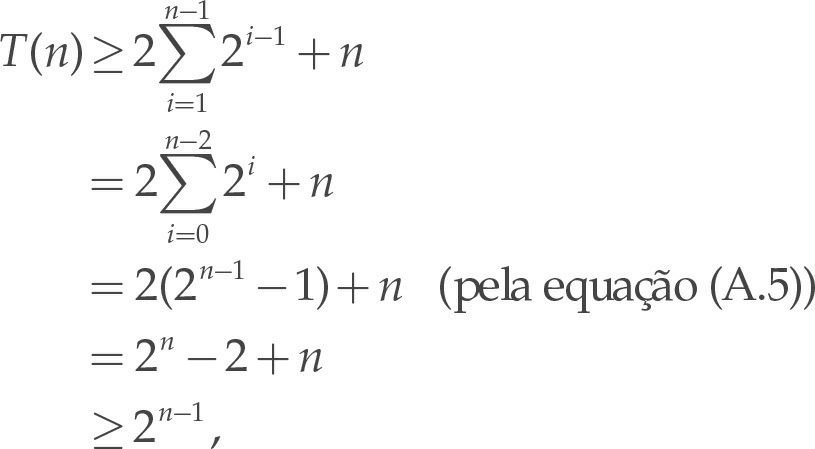





In [ ]:

import sys
 
 
# Função # para encontrar a maneira mais eficiente de multiplicar
# uma determinada sequência de matrizes
def matrixChainMultiplication(dims, i, j, lookup):
 
    # Caso base: uma matriz
    if j <= i + 1:
        return 0
 
    # armazena o número mínimo de multiplicações escalares (ou seja, custo)
    # necessário para calcular a matriz `M[i+1] … M[j] = M[i…j]`
    min = sys.maxsize
 
    # se o subproblema for visto pela primeira vez, resolva-o e
    # armazena seu resultado em uma tabela de pesquisa
    if lookup[i][j] == 0:
 
        # assume o mínimo em cada posição possível em que o
        # A sequência de matrizes # pode ser dividida
 
        '''
            (M[i+1]) × (M[i+2]………………M[j])
            (M[i+1]M[i+2]) × (M[i+3…………M[j])
            …
            …
            (M[i+1]M[i+2]…………M[j-1]) × (M[j])
        '''
 
        for k in range(i + 1, j):
 
            # recorrente para `M[i+1]…M[k]` para obter uma matriz `i × k`
            cost = matrixChainMultiplication(dims, i, k, lookup)
 
            # recorrente para `M[k+1]…M[j]` para obter uma matriz `k × j`
            cost += matrixChainMultiplication(dims, k, j, lookup)
 
            # custo para multiplicar duas matrizes `i × k` e `k × j`
            cost += dims[i] * dims[k] * dims[j]
 
            if cost < min:
                min = cost
 
        lookup[i][j] = min
 
    # retorna o custo mínimo para multiplicar `M[j+1]…M[j]`
    return lookup[i][j]
 
 
if __name__ == '__main__':
 
    # Matrix `M[i]` tem dimensão `dims[i-1] × dims[i]` para `i=1…n`
    # A entrada # é matriz 10 × 30, matriz 30 × 5, matriz 5 × 60
    dims = [10, 30, 5, 60]
 
    # Tabela de pesquisa # para armazenar a solução para subproblemas já computados
    lookup = [[0 for x in range(len(dims))] for y in range(len(dims))]
 
    n = len(dims)
    print('The minimum cost is', matrixChainMultiplication(dims, 0, n - 1, lookup))

The minimum cost is 4500


# **Divisão e conquista: Cálculo de potência (x, n)**
**Conceito**: a instância dada do problema é dividida em duas ou mais instâncias menores, cada instância menor é resolvida usando o próprio algoritmo que está sendo definido, as soluções das instâncias menores são combinadas para produzir uma solução da instância original.
* A segunda fase é implementada por uma chamada recursiva. Essa é a fase da conquista.


---



* O problema pode ser definido recursivamente por:
* potência(x, n) = potência(x, n / 2) * potência(x, n / 2); // se n for par
* potência(x, n) = x * potência(x, n / 2) * potência(x, n / 2); // se n é ímpar
* Complexidade de Tempo: O(n)

In [1]:
# Python3 program to calculate pow(x,n)

# Function to calculate x
# raised to the power y

def power(x, y):

	if (y == 0):
		return 1
	elif (int(y % 2) == 0):
		return (power(x, int(y / 2)) *
				power(x, int(y / 2)))
	else:
		return (x * power(x, int(y / 2)) *
				power(x, int(y / 2)))


# Driver Code
if __name__ == "__main__":
	x = 5
	y = 15

	# Function call
	print(power(x, y))

# This code is contributed by Smitha Dinesh Semwal.


30517578125


# **Algoritmo Guloso: Frações Egípcias**
**Conceito**: Um algoritmo guloso é uma estratégia algorítmica que faz a melhor escolha ótima em cada pequeno estágio com o objetivo de eventualmente levar a uma solução ótima global. Isso significa que o algoritmo escolhe a melhor solução no momento sem levar em consideração as consequências. Ele escolhe a melhor saída imediata, mas não considera o quadro geral, portanto, é considerado ganancioso.

---


* Cada fração positiva pode ser representada como soma de frações unitárias únicas.
* Uma fração é fração unitária se o numerador for 1 e o denominador for um número inteiro positivo.
* Para um determinado número da forma 'nr/dr' onde dr > nr, primeiro encontre a maior fração unitária possível, então repita para a parte restante.
* R: 1 + n + 1 + 1 + 1 + 1 + n + 1
* R: 6 + 2n 
* Complexidade: O(n) 

In [ ]:
# Python3 program to print a fraction
# in Egyptian Form using Greedy
# Algorithm

# import math package to use
# ceiling function
import math

# define a function egyptianFraction
# which receive parameter nr as
# numerator and dr as denominator
def egyptianFraction(nr, dr):

	print("The Egyptian Fraction " +
		"Representation of {0}/{1} is".
				format(nr, dr), end="\n")

	# empty list ef to store
	# denominator
	ef = [] # ----------- 1 

	# while loop runs until
	# fraction becomes 0 i.e,
	# numerator becomes 0
	while nr != 0: # ------- n

		# taking ceiling
		x = math.ceil(dr / nr) # --- 1 

		# storing value in ef list
		ef.append(x)# ------ 1
	
		# updating new nr and dr
		nr = x * nr - dr # ---- 1
		dr = dr * x # ------- 1

	# printing the values
	for i in range(len(ef)): # ------------ n
		if i != len(ef) - 1: # ------ 1
			print(" 1/{0} +" .
					format(ef[i]), end = " ")
		else:
			print(" 1/{0}" .
					format(ef[i]), end = " ")

# calling the function
egyptianFraction(6, 14)

# This code is contributed
# by Anubhav Raj Singh


The Egyptian Fraction Representation of 6/14 is
 1/3 +  1/11 +  1/231 

# **Recursividade: Máximo Divisor Comum**
**Conceito**: um algoritmo que chama a si mesmo com valores de entrada "menores (ou mais simples)" e que obtém o resultado para a entrada atual aplicando operações simples ao valor retornado para a entrada menor (ou mais simples). 

---


* O algoritmo euclidiano é uma maneira de encontrar o máximo divisor comum de dois números inteiros positivos.
* MDC de dois números é o maior número que os divide.
* Uma maneira simples de encontrar o GCD é fatorar os dois números e multiplicar os fatores primos comuns.
* Se subtrairmos um número menor de um maior (reduzimos um número maior), o MDC não muda. Portanto, se continuarmos subtraindo repetidamente o maior de dois, acabamos com GCD.
* Agora, em vez de subtração, se dividirmos o número menor, o algoritmo para quando encontrarmos o resto 0.
* Complexidade de Tempo: O(Log min(a, b))

In [ ]:
# Python3 program to demonstrate Basic Euclidean Algorithm

# T(n) = T(2log2^n) + 1

# Function to return gcd of a and b
def gcd(a, b):
	if a == 0:
		return b

	return gcd(b % a, a)

# Driver code
if __name__ == "__main__":
    a = 10
    b = 15
    print("gcd(", a, ",", b, ") = ", gcd(a, b))

    a = 35
    b = 10
    print("gcd(", a, ",", b, ") = ", gcd(a, b))

    a = 31
    b = 2
    print("gcd(", a, ",", b, ") = ", gcd(a, b))

# Code Contributed By Mohit Gupta_OMG <(0_o)>


gcd( 10 , 15 ) =  5
gcd( 35 , 10 ) =  5
gcd( 31 , 2 ) =  1


# **Backtracking: m Problema de Coloração (Grafos)**
**Conceito**: Um algoritmo de retrocesso é um algoritmo de solução de problemas que usa uma abordagem de força bruta para encontrar a saída desejada.

* A abordagem de força bruta experimenta todas as soluções possíveis e escolhe as soluções desejadas/melhores.
* O termo backtracking sugere que, se a solução atual não for adequada, volte atrás e tente outras soluções. Assim, a recursão é usada nesta abordagem.

---

* Dado um grafo o problema visa resolver quais vertices podem ser coloridos com cores diferentes
* Complexidade de tempo: O(mV). Existe um total de O(mV) combinações de cores Exponencial.

In [1]:
class Graph():
    """Classe onde implementa a coloracaoo de vertices de um grafo utilizando backtracking, 
    onde cada vizinho de um grafo deve ser colorido com cores distintas. 

    Complexidade: O(m^V)
    """
  
    def __init__(self, vertices):
        self.V = vertices
        # se nao passar um grafo, ele gera uma matriz preenchida com zeros
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
  
    def isSafe(self, v, colour, c):
        """Função que irá verificar se o colorArray atual do gráfico é seguro ou não.

        Parameters
        ----------
        v: vertice atual para ser analisado se pode colorir
        colour: array de cores
        c: vertice alvo para verificar se a cor vai ser igual
        """
        for i in range(self.V):
            # verifica se os vizinhos do vertice v possui a mesma cor que os vértices vizinhos
            # caso nao possua, significa que a cor i pode ser atribuida ao vertice v
            if self.graph[v][i] == 1 and colour[i] == c:
                return False
        return True
  
    def graphColourUtil(self, m, colour, v):
        """Uma função recursiva que usa o índice atual, o número de vértices 
        e a matriz de cores. Se a chamada recursiva retornar true, a coloração 
        será possível. Ele retorna false se as m cores não puderem ser atribuídas.

        Parameters
        ----------
        m: numero de cores (numero inteiro)
        colour: array de cores
        v: vertice atual para ser analisado
        """
        # caso base
        if v == self.V:
            return True
  
        for c in range(1, m + 1):
            # verifica se é possivel colorir o vertice atual com a cor c
            if self.isSafe(v, colour, c) == True:
                # se foi possivel, atribui a cor ao vertice analisado
                colour[v] = c
                # analisa recursivamente os proximos vertices para tentar colorir 
                if self.graphColourUtil(m, colour, v + 1) == True:
                    return True

                # backtrack
                colour[v] = 0
  
    def graphColouring(self, m):
        """Funcao que ira realizar a coloracao do grafo utilizando os métodos
        apresentados acima.

        Complexidade: O(m^V)
        """
        # Inicialmente, a matriz de cores é inicializada com 0.
        colour = [0] * self.V

        # Chama graphColoringAlgorithmUtil() para o vértice 0.
        # iniciando a coloracao do grafo a partir da primeira posicao
        # ira rodar a funcao recursivamente até que seja possivel colorir o grafo ou não
        if self.graphColourUtil(m, colour, 0) == None:
            print("Nao é possivel colorir!")
            return False

        print("E possivel colorir!")
        print("As cores atribuídas são as seguintes:")
        for c in range(self.V):
            print("Vertice: ", c, " Cor: ", colour[c])
        return True
  
  
if __name__ == '__main__':
    g = Graph(4)
    g.graph = [[0, 1, 1, 1],
               [1, 0, 1, 0], 
               [1, 1, 0, 1], 
               [1, 0, 1, 0]]
    m = 3
  
    g.graphColouring(m)

E possivel colorir!
As cores atribuídas são as seguintes:
Vertice:  0  Cor:  1
Vertice:  1  Cor:  2
Vertice:  2  Cor:  3
Vertice:  3  Cor:  2


In [ ]:
# Python3 program for solution of M Coloring
# problem using backtracking


class Graph():

	def __init__(self, vertices):
		self.V = vertices
		self.graph = [[0 for column in range(vertices)]
					for row in range(vertices)]

	# A utility function to check
	# if the current color assignment
	# is safe for vertex v
	def isSafe(self, v, colour, c):
		for i in range(self.V):
			if self.graph[v][i] == 1 and colour[i] == c:
				return False
		return True

	# A recursive utility function to solve m
	# coloring problem
	def graphColourUtil(self, m, colour, v):
		if v == self.V:
			return True

		for c in range(1, m + 1):
			if self.isSafe(v, colour, c) == True:
				colour[v] = c
				if self.graphColourUtil(m, colour, v + 1) == True:
					return True
				colour[v] = 0

	def graphColouring(self, m):
		colour = [0] * self.V
		if self.graphColourUtil(m, colour, 0) == None:
			return False

		# Print the solution
		print("Solution exist and Following are the assigned colours:")
		for c in colour:
			print(c, end=' ')
		return True


# Driver Code
if __name__ == '__main__':
	g = Graph(4)
	g.graph = [[0, 1, 1, 1], [1, 0, 1, 0], [1, 1, 0, 1], [1, 0, 1, 0]]
	m = 3

	# Function call
	g.graphColouring(m)

# This code is contributed by Divyanshu Mehta


Solution exist and Following are the assigned colours:
1 2 3 2 